In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES/SOCR-HeightWeight.csv', index_col = 0)
dataset.head()

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


In [3]:
dataset.shape # the function shape returns the shape of an array.
#it is a tuple of integers.in other words it is a tuple with the number of elements per axis(dimension)

(25000, 2)

In [4]:
dataset.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [5]:
dataset.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [6]:
dataset['Height(Inches)']

Index
1        65.78331
2        71.51521
3        69.39874
4        68.21660
5        67.78781
           ...   
24996    69.50215
24997    64.54826
24998    64.69855
24999    67.52918
25000    68.87761
Name: Height(Inches), Length: 25000, dtype: float64

In [7]:
#EDA(Exploratory Data Analysis)
import matplotlib.style as style
style.use('fivethirtyeight')

In [8]:
dataset['Height(Inches)'][10]

66.78236

## Indexing in pandas

#### Index-based selection

To select the first row of data in a DataFrame we may use

In [9]:
dataset.iloc[0]

Height(Inches)     65.78331
Weight(Pounds)    112.99250
Name: 1, dtype: float64

Both loc and iloc are row-first and column second, the opposite of native pyton, which is column first and row second. it is easier to retrieve rows and marginally harder to retrieve columns

In [10]:
# to get column with iloc, we can do the following
dataset.iloc[:,0]
#: operator comes from native python, when combined with other selectors, it can be used to indicate a range of values.

Index
1        65.78331
2        71.51521
3        69.39874
4        68.21660
5        67.78781
           ...   
24996    69.50215
24997    64.54826
24998    64.69855
24999    67.52918
25000    68.87761
Name: Height(Inches), Length: 25000, dtype: float64

In [11]:
dataset.iloc[:6, 0]

Index
1    65.78331
2    71.51521
3    69.39874
4    68.21660
5    67.78781
6    68.69784
Name: Height(Inches), dtype: float64

In [12]:
dataset['Weight(Pounds)']

Index
1        112.9925
2        136.4873
3        153.0269
4        142.3354
5        144.2971
           ...   
24996    118.0312
24997    120.1932
24998    118.2655
24999    132.2682
25000    124.8742
Name: Weight(Pounds), Length: 25000, dtype: float64

In [13]:
dataset.iloc[:, 1]

Index
1        112.9925
2        136.4873
3        153.0269
4        142.3354
5        144.2971
           ...   
24996    118.0312
24997    120.1932
24998    118.2655
24999    132.2682
25000    124.8742
Name: Weight(Pounds), Length: 25000, dtype: float64

In [14]:
dataset.iloc[:7, 1]

Index
1    112.9925
2    136.4873
3    153.0269
4    142.3354
5    144.2971
6    123.3024
7    141.4947
Name: Weight(Pounds), dtype: float64

In [15]:
# to select the second and third entries
dataset.iloc[1:3, 0]

Index
2    71.51521
3    69.39874
Name: Height(Inches), dtype: float64

In [16]:
# let's pass a list
dataset.iloc[[0, 1, 2], 0]

Index
1    65.78331
2    71.51521
3    69.39874
Name: Height(Inches), dtype: float64

In [17]:
dataset.iloc[-5:]

,Height(Inches),Weight(Pounds)
Index,,
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655
24999,67.52918,132.2682
25000,68.87761,124.8742


In [18]:
dataset.iloc[-5] # this accesses rows i.e the 5th row from the last.

Height(Inches)     69.50215
Weight(Pounds)    118.03120
Name: 24996, dtype: float64

### Label-based selection
it uses the loc operator. the data index value mtters more than it's position.

In [19]:
dataset.loc[1, 'Height(Inches)']

65.78331

In [20]:
dataset.loc[:, ['Height(Inches)', 'Weight(Pounds)']]

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
...,...,...
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655


### Choosing between loc and iloc

The two methods use slightly different indexing schemes.
iloc uses the python stdlib indexing scheme, where the first element of the range is included and last one excluded. i.e 0:10 will select entries 0,...,9
loc, meanwhile, indexes innclusively . so 0:10 will select entries 0,...10.

### Manipulating the index
Label-based selection derives its power from the labels in the index. Critically, the index we use is not immutable. We can manipulate the index in any way we see fit. We use the set_index()

In [21]:
dataset.set_index("Height(Inches)")
# this is useful if you can come up with an index fo the dataset which is better than the current one.

,Weight(Pounds)
Height(Inches),
65.78331,112.9925
71.51521,136.4873
69.39874,153.0269
68.21660,142.3354
67.78781,144.2971
...,...
69.50215,118.0312
64.54826,120.1932
64.69855,118.2655


### Conditional selection
To do interesting things with data, we often need to ask questions based on conditions i.e lets say we are intrested in height greater than 65 only.

In [22]:
dataset['Height(Inches)'] >= 65

Index
1         True
2         True
3         True
4         True
5         True
         ...  
24996     True
24997    False
24998    False
24999     True
25000     True
Name: Height(Inches), Length: 25000, dtype: bool

In [23]:
# to select relevant data with heights that are greater that 65
dataset.loc[dataset['Height(Inches)'] >= 65]

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
...,...,...
24994,66.19462,118.7974
24995,67.21126,127.6603
24996,69.50215,118.0312


In [24]:
# can we conlude that the average mean for weight is 65?

In [25]:
# lets rename the columns to solve this error
dataset = dataset.rename(columns={'Height(Inches)':'Height', 'Weight(Pounds)':'Weight'})


In [26]:
dataset

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
...,...,...
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655


In [27]:
dataset.loc[(dataset.Height >= 65) & (dataset.Weight >= 127)]

,Height,Weight
Index,,
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
7,69.80204,141.4947
...,...,...
24990,70.11839,141.2370
24992,71.91656,128.2840
24993,70.96218,146.1936


isin lets you select data whose value is in a list of values
isnulll and its companion notnull lets you highlight values which are not(or are not) empty(NaN)

In [29]:
dataset.loc[dataset.Height.isnull()]

,Height,Weight
Index,,


## Assigning data
you can assign a constant value or with iterable values

In [30]:
dataset['obese'] = 'Overweight'
dataset

,Height,Weight,obese
Index,,,
1,65.78331,112.9925,Overweight
2,71.51521,136.4873,Overweight
3,69.39874,153.0269,Overweight
4,68.21660,142.3354,Overweight
5,67.78781,144.2971,Overweight
...,...,...,...
24996,69.50215,118.0312,Overweight
24997,64.54826,120.1932,Overweight
24998,64.69855,118.2655,Overweight


In [31]:
dataset['index_backwards'] = range(len(dataset), 0, -1)
dataset

,Height,Weight,obese,index_backwards
Index,,,,
1,65.78331,112.9925,Overweight,25000
2,71.51521,136.4873,Overweight,24999
3,69.39874,153.0269,Overweight,24998
4,68.21660,142.3354,Overweight,24997
5,67.78781,144.2971,Overweight,24996
...,...,...,...,...
24996,69.50215,118.0312,Overweight,5
24997,64.54826,120.1932,Overweight,4
24998,64.69855,118.2655,Overweight,3


<AxesSubplot:>

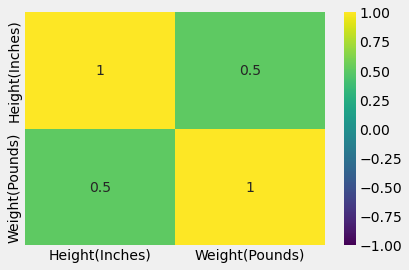

In [11]:
sns.heatmap(dataset.corr(), annot=True, cmap='viridis', vmax=1.0, vmin=-1.0)

Histgram for heights

In [ ]:
plt.figure(figsize=(7,6))
plt.hist(dataset['Height(Inches)'], bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')

Histgram for Weights

In [ ]:
plt.figure(figsize=(7,6))
plt.hist(dataset['Weight(Pounds)'], bins=20, rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(dataset['Height(Inches)'], dataset['Weight(Pounds)'])

Outliers
1. Detect outliers using IQR

Detect outliers based od weight

In [ ]:
Q1 = dataset['Weight(Pounds)'].quantile(0.25)
Q3 = dataset['Weight(Pounds)'].quantile(0.75)
Q1, Q3

In [ ]:
IQR = Q3 - Q1

In [ ]:
IQR

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

In [ ]:
dataset['Weight(Pounds)'].describe()

In [ ]:
dataset[(dataset['Weight(Pounds)']<lower_limit)|(dataset['Weight(Pounds)']>upper_limit)]

Detect outliers based on height

In [ ]:
Q1 = dataset['Height(Inches)'].quantile(0.25)
Q3 = dataset['Height(Inches)'].quantile(0.75)
Q1, Q3

In [ ]:
IQR = Q1 - Q3
IQR

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

In [ ]:
dataset[(dataset['Height(Inches)']<lower_limit)|(dataset['Height(Inches)']>upper_limit)]

Remove outliers

In [ ]:
dataset_no_outlier_Height = dataset[(dataset['Height(Inches)']>lower_limit)&(dataset['Height(Inches)']<upper_limit)]
dataset_no_outlier_Height

In [ ]:
data = pd.DataFrame(dataset_no_outlier_Height)
data.head()

In [ ]:
data.shape

# Summary Functions and Maps


In [1]:
import pandas as pd
pd.set_option('display.max_row', 5)
import numpy as np
reviews = pd.read_csv('C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES/winemag-data-130k-v2.csv', index_col =0)

In [2]:
reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [3]:
# summary functions restructure the data in some useful way. eg describe
reviews.points.describe()

count    129971.000000
mean         88.447138
             ...      
75%          91.000000
max         100.000000
Name: points, Length: 8, dtype: float64

This method generates a high-level summary of the attributes of a given column. It is type-aware, meaning that its output changes based on the data type of the input. This makes sense for numerical data; or string data here's what we get:

In [5]:
reviews.taster_name.describe()

count         103727
unique            19
top       Roger Voss
freq           25514
Name: taster_name, dtype: object

In [6]:
reviews.points.mean()

88.44713820775404

In [7]:
# unique values
reviews.taster_name.unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [8]:
# to see a list and ow often they occur
reviews.taster_name.value_counts()

Roger Voss           25514
Michael Schachner    15134
                     ...  
Fiona Adams             27
Christina Pickard        6
Name: taster_name, Length: 19, dtype: int64

In [11]:
reviews.region_1.unique()
reviews.region_1.value_counts()

Napa Valley                4480
Columbia Valley (WA)       4124
                           ... 
Vin Santo di Carmignano       1
Paestum                       1
Name: region_1, Length: 1229, dtype: int64

In [12]:
reviews.region_2.unique()
reviews.region_2.value_counts()

Central Coast     11065
Sonoma             9028
                  ...  
South Coast         272
New York Other      231
Name: region_2, Length: 17, dtype: int64

## maps
We often have a need for creating new representatons form existing data, or for transforming data from the format it is now to the format that we want it to in later. 

There are two mapping methods that you will use often.
map() is the first, and slightly simpler one. e.g suppose we want to remean the scores the wines recieved to 0.

In [13]:
review_points_mean = reviews.points.mean()
reviews.points.map(lambda p: p - review_points_mean)

0        -1.447138
1        -1.447138
            ...   
129969    1.552862
129970    1.552862
Name: points, Length: 129971, dtype: float64

apply() is the equivalent method if we want to transform a whole DataFrame by calling a custom method on each row.

In [14]:
def remean_points(row):
    row.points = row.points - review_points_mean
    return row
reviews.apply(remean_points, axis = 'columns')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,-1.447138,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,-1.447138,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,1.552862,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,1.552862,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [15]:
reviews.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


In [19]:
# here's a faster way of remeaning our points column
review_points_mean = reviews.points.mean()
reviews.points - review_points_mean

0        -1.447138
1        -1.447138
            ...   
129969    1.552862
129970    1.552862
Name: points, Length: 129971, dtype: float64

In [20]:
# an easy way of combinig country and region information in the dataset would be to do the following
reviews.country + "-" + reviews.region_1

0            Italy-Etna
1                   NaN
              ...      
129969    France-Alsace
129970    France-Alsace
Length: 129971, dtype: object

In [21]:
reviews_per_country = reviews.country.value_counts()

In [22]:
reviews_per_country

US        54504
France    22093
          ...  
China         1
Egypt         1
Name: country, Length: 43, dtype: int64

In [27]:
reviews_per_country.head(6)

US          54504
France      22093
            ...  
Portugal     5691
Chile        4472
Name: country, Length: 6, dtype: int64

I'm an economical wine buyer. Which wine is the "best bargain"? Create a variable bargain_wine with the title of the wine with the largest points-to-price ratio in the dataset.

In [29]:
bargain_idx = (reviews.points / reviews.price).idxmax()
bairgain_wine = reviews.loc[bargain_idx, 'title']

In [31]:
bairgain_wine

'Bandit NV Merlot (California)'

There are only so many words you can use when describing a bottle of wine. Is a wine more likely to be "tropical" or "fruity"? Create a Series descriptor_counts counting how many times each of these two words appears in the description column in the dataset. (For simplicity, let's ignore the capitalized versions of these words.)

In [32]:
n_trop = reviews.description.map(lambda desc: "tropical" in desc).sum()
n_fruity = reviews.description.map(lambda desc: "fruity" in desc).sum()
descriptor_counts = pd.Series([n_trop, n_fruity], index=['tropical', 'fruity'])

In [34]:
descriptor_counts

tropical    3607
fruity      9090
dtype: int64

We'd like to host these wine reviews on our website, but a rating system ranging from 80 to 100 points is too hard to understand - we'd like to translate them into simple star ratings. A score of 95 or higher counts as 3 stars, a score of at least 85 but less than 95 is 2 stars. Any other score is 1 star.

Also, the Canadian Vintners Association bought a lot of ads on the site, so any wines from Canada should automatically get 3 stars, regardless of points.

Create a series star_ratings with the number of stars corresponding to each review in the dataset.

In [35]:
def stars(row):
    if row.country == 'Canada':
        return 3
    elif row.points >= 95:
        return 3
    elif row.points >= 85:
        return 2
    else:
        return 1
    
star_ratings = reviews.apply(stars, axis='columns')
        

In [36]:
star_ratings

0         2
1         2
         ..
129969    2
129970    2
Length: 129971, dtype: int64

In [37]:
star_ratings.head()

0    2
1    2
2    2
3    2
4    2
dtype: int64

# Grouping and Sorting
Maps allow us to transform data in a DataFrame or Series one value ata time for an entire column. However, often we want to group our data, and then do something specific to the group the data is in.

We do this with the groupby() operation

## Groupwise analysis
We can replicate what value_counts() by the following


In [39]:
reviews.groupby('points').points.count().head()
# we've grouped the points with the counts of each points 

points
80     397
81     692
82    1836
83    3025
84    6480
Name: points, dtype: int64

In [40]:
reviews.groupby('points').price.min()

points
80      5.0
81      5.0
       ... 
99     44.0
100    80.0
Name: price, Length: 21, dtype: float64

In [41]:
# selecting the name of the first wine reviewed from each winery in the dataset
reviews.groupby('winery').apply(lambda df: df.title.iloc[0])

winery
1+1=3                          1+1=3 NV Rosé Sparkling (Cava)
10 Knots                 10 Knots 2010 Viognier (Paso Robles)
                                  ...                        
àMaurice    àMaurice 2013 Fred Estate Syrah (Walla Walla V...
Štoka                         Štoka 2009 Izbrani Teran (Kras)
Length: 16757, dtype: object

In [42]:
# We can group by more than on column
#e.g here's ow we would pick out the best wine by country and province
reviews.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmax()])

country  \
country   province                      
Argentina Mendoza Province  Argentina   
          Other             Argentina   
...                               ...   
Uruguay   San Jose            Uruguay   
          Uruguay             Uruguay   

                                                                  description  \
country   province                                                              
Argentina Mendoza Province  If the color doesn't tell the full story, the ...   
          Other             Take note, this could be the best wine Colomé ...   
...                                                                       ...   
Uruguay   San Jose          Baked, sweet, heavy aromas turn earthy with ti...   
          Uruguay           Cherry and berry aromas are ripe, healthy and ...   

                                          designation  points  price  \
country   province                                                     
Argentina Mendoza Province           Nicasia Vineyard      97  120.0   
          Other                               Reserva      95   90.0   
...                                               ...     ...    ...   
Uruguay   San Jose           El Preciado Gran Reserva      87   50.0   
          Uruguay           Blend 002 Limited Edition      91   22.0   

                                    province region_1 region_2  \
country   province                                               
Argentina Mendoza Province  Mendoza Province  Mendoza      NaN   
          Other                        Other    Salta      NaN   
...                                      ...      ...      ...   
Uruguay   San Jose                  San Jose      NaN      NaN   
          Uruguay                    Uruguay      NaN      NaN   

                                  taster_name taster_twitter_handle  \
country   province                                                    
Argentina Mendoza Province  Michael Schachner           @wineschach   
          Other             Michael Schachner           @wineschach   
...                                       ...                   ...   
Uruguay   San Jose          Michael Schachner           @wineschach   
          Uruguay           Michael Schachner           @wineschach   

                                                                        title  \
country   province                                                              
Argentina Mendoza Province  Bodega Catena Zapata 2006 Nicasia Vineyard Mal...   
          Other                            Colomé 2010 Reserva Malbec (Salta)   
...                                                                       ...   
Uruguay   San Jose          Castillo Viejo 2005 El Preciado Gran Reserva R...   
          Uruguay           Narbona NV Blend 002 Limited Edition Tannat-Ca...   

                                          variety                winery  
country   province                                                       
Argentina Mendoza Province                 Malbec  Bodega Catena Zapata  
          Other                            Malbec                Colomé  
...                                           ...                   ...  
Uruguay   San Jose                      Red Blend        Castillo Viejo  
          Uruguay           Tannat-Cabernet Franc               Narbona  

[425 rows x 13 columns]

Another groupby() method is agg(), which lets you run a bunch of different functions on your DataFrame simultaneously. E.g we can generate a simple statisitcal summary of the dataset as follows:

In [44]:
reviews.groupby(['country']).price.agg([len, min, max]).head()

,len,min,max
country,,,
Argentina,3800,4.0,230.0
Armenia,2,14.0,15.0
Australia,2329,5.0,850.0
Austria,3345,7.0,1100.0
Bosnia and Herzegovina,2,12.0,13.0


## Multi-indexes
A multi-index differs from a regular index in that it has multiple levels.E.g

In [45]:
countries_reviewed = reviews.groupby(['country', 'province']).description.agg([len])
countries_reviewed

len
country   province              
Argentina Mendoza Province  3264
          Other              536
...                          ...
Uruguay   San Jose             3
          Uruguay             24

[425 rows x 1 columns]

In [47]:
countries_reviewed.head()

len
country   province              
Argentina Mendoza Province  3264
          Other              536
Armenia   Armenia              2
Australia Australia Other    245
          New South Wales     85

In [48]:
mi = countries_reviewed.index
type(mi)

pandas.core.indexes.multi.MultiIndex

The multi-ndex method will be used is the one for converting back to a regular index, the reset_index() method:

In [49]:
countries_reviewed.reset_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
...,...,...,...
423,Uruguay,San Jose,3
424,Uruguay,Uruguay,24


## Sorting
Grouping returns data in index order, not in value order i.e when outputting the result of a groupby, the order of the rows is dependent on the values in the index not int data.

To get data in the we want it we can sort it ourselves. The sort_values() method is handy for this.

In [51]:
countries_reviewed = countries_reviewed.reset_index()
countries_reviewed.sort_values(by='len').head()

,index,country,province,len
179,179,Greece,Muscat of Kefallonian,1
192,192,Greece,Sterea Ellada,1
194,194,Greece,Thraki,1
354,354,South Africa,Paardeberg,1
40,40,Brazil,Serra do Sudeste,1


Sort_values() defaults to an ascending sort, where the lowest go first, However, most of the time we want a descending sort, where the higher numbers go first. i.e

In [52]:
countries_reviewed.sort_values(by='len', ascending=False)

,index,country,province,len
392,392,US,California,36247
415,415,US,Washington,8639
...,...,...,...,...
63,63,Chile,Coelemu,1
149,149,Greece,Beotia,1


To sort by index values, use the companion method sort_index(). This method has the same arguments and default order


In [53]:
countries_reviewed.sort_index()

,index,country,province,len
0,0,Argentina,Mendoza Province,3264
1,1,Argentina,Other,536
...,...,...,...,...
423,423,Uruguay,San Jose,3
424,424,Uruguay,Uruguay,24


What is the best wine I can buy for a given amount of money? Create a Series whose index is wine prices and whose values is the maximum number of points a wine costing that much was given in a review. Sort the values by price, ascending (so that 4.0 dollars is at the top and 3300.0 dollars is at the bottom).

In [4]:
best_rating_per_price = reviews.groupby('price').points.max()
best_rating_per_price

price
4.0       86
5.0       87
          ..
2500.0    96
3300.0    88
Name: points, Length: 390, dtype: int64

What are the minimum and maximum prices for each variety of wine? Create a DataFrame whose index is the variety category from the dataset and whose values are the min and max values thereof.

In [2]:
price_extremes = reviews.groupby(['variety']).price.agg([min, max])

In [3]:
price_extremes

,min,max
variety,,
Abouriou,15.0,75.0
Agiorgitiko,10.0,66.0
...,...,...
Çalkarası,19.0,19.0
Žilavka,15.0,15.0


What are the most expensive wine varieties? Create a variable sorted_varieties containing a copy of the dataframe from the previous question where varieties are sorted in descending order based on minimum price, then on maximum price (to break ties).

In [5]:
sorted_varieties = price_extremes.sort_values(by=['min', 'max'], ascending=False)

In [6]:
sorted_varieties

,min,max
variety,,
Ramisco,495.0,495.0
Terrantez,236.0,236.0
...,...,...
Vital,NaN,NaN
Zelen,NaN,NaN


Create a Series whose index is reviewers and whose values is the average review score given out by that reviewer. Hint: you will need the taster_name and points columns.

In [7]:
reviewer_mean_ratings = reviews.groupby('taster_name').points.mean()

In [8]:
reviewer_mean_ratings

taster_name
Alexander Peartree    85.855422
Anna Lee C. Iijima    88.415629
                        ...    
Susan Kostrzewa       86.609217
Virginie Boone        89.213379
Name: points, Length: 19, dtype: float64

In [11]:
country_variety_counts = reviews.groupby(['country', 'variety']).description.agg([len])

In [13]:
country_variety_counts

len
country   variety                
Argentina Barbera               1
          Bonarda             105
...                           ...
Uruguay   Tempranillo-Tannat    1
          White Blend           1

[1612 rows x 1 columns]

In [14]:
country_variety_counts.sort_values(by='len', ascending=False)

len
country variety                 
US      Pinot Noir          9885
        Cabernet Sauvignon  7315
...                          ...
Mexico  Rosado                 1
Uruguay White Blend            1

[1612 rows x 1 columns]

In [16]:
# PdSeries
country_variety_counts2 = reviews.groupby(['country', 'variety']).size().sort_values(ascending=False)
country_variety_counts2

country  variety           
US       Pinot Noir            9885
         Cabernet Sauvignon    7315
                               ... 
Mexico   Rosado                   1
Uruguay  White Blend              1
Length: 1612, dtype: int64

# Data Types and Missing Values
## Dtypes
The data type for a column in a DataFrame or a Seried is known as the dtype.

You can use the dtype property to grab th type of a specific column. eg. if we want to get the dtype of the proce column:

In [18]:
reviews.price.dtype

dtype('float64')

In [19]:
# to return the dype of every column
reviews.dtypes

country        object
description    object
                ...  
variety        object
winery         object
Length: 13, dtype: object

It's possible to convert a column of one type into another wherever such a conversion makes sense by using the astype() function. e.g We may transform the points column from its existing int64 data type into a float64 data type:

In [20]:
reviews.points.astype('float64')

0         87.0
1         87.0
          ... 
129969    90.0
129970    90.0
Name: points, Length: 129971, dtype: float64

In [22]:
# A DataFrame or Series has its own dtype, too:
reviews.index.dtype

dtype('int64')

## Missing Data
Entries missing values are given the value NaN,
To select NaN entries you can use pd.sinull() or its companion pd.notnull()
e.g

In [23]:
reviews[pd.isnull(reviews.country)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ
129900,NaN,This wine offers a delightful bouquet of black...,NaN,91,32.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Psagot 2014 Merlot,Merlot,Psagot


To replace missing values, we use the fillna() which provides a few different stategies for mitigating such data e.g we can replace each NaN with an "Unknown"

In [24]:
reviews.region_2.fillna("Unknown")

0         Unknown
1         Unknown
           ...   
129969    Unknown
129970    Unknown
Name: region_2, Length: 129971, dtype: object

We can also fill each missing value with the first non-null that appears sometime after the given record inthe database. This is known as the backfill strategy.

To replace a value i.e suppose since the dataset was published, reviewer Kerin O'Keefe has changed her Twitter handle from @kerinokeefe to @kerino. One way to reflect this in the dataset is using the replace() method:

In [25]:
reviews.taster_twitter_handle.replace('@kerinokeefe', '@kerino')

0            @kerino
1         @vossroger
             ...    
129969    @vossroger
129970    @vossroger
Name: taster_twitter_handle, Length: 129971, dtype: object

The replace() method is handy for replacing missing data which is given some kind of sentinel value in the dataset: things like 'Unknown', 'Undisclosed','Invalid', and so on


Sometimes the price column is null. How many reviews in the dataset are missing a price?


In [26]:
missing_price_reviews = reviews[reviews.price.isnull()]
n_missing_prices = len(missing_price_reviews)
# alternative solution: if we sum a boolean series, True is treated as 1 and False as 0
n_missing_prices = reviews.price.isnull().sum()
# or equivalently:
n_missing_prices = pd.isnull(reviews.price).sum()

What are the most common wine-producing regions? Create a Series counting the number of times each value occurs in the region_1 field. This field is often missing data, so replace missing values with Unknown. Sort in descending order. Your output should look something like this:

In [27]:
reviews_per_region = reviews.region_1.fillna('Unknown').value_counts().sort_values(ascending=False)

In [28]:
reviews_per_region

Unknown        21247
Napa Valley     4480
               ...  
Geelong            1
Paestum            1
Name: region_1, Length: 1230, dtype: int64

# Renaming and Combining
Often data will come in column names and index names or any other naming conventions that we're not satisfied with.
We can also explore how to combine data from multiple DataFrames and/or Series

## Renaming
The Rename() function let's you change index names and/ or column names. E.g to chnage the points column in our dataset to score, we would do:

In [29]:
reviews.rename(columns={'points':'score'})

,country,description,designation,score,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


rename() lets you rename index or column values by specifying a index or column keyword parameter. It supports a variety of inputs formats but usually a Python dictionary is the most convinient. E.g

In [30]:
reviews.rename(index={0: 'firstEntry', 1:'secondEntry'})

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
firstEntry,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
secondEntry,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


we'll probably rename columns very often, but rename index values very rarely. For that, set_index() is usually more convinient.

Both the row index and the column index can have their own name attribute.
The complimentary rename_axis() method may be used to chnage these names.

In [31]:
reviews.rename_axis('wines', axis ='rows').rename_axis('fields', axis='columns')

fields,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
wines,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


When performing operations, we'll often need to combine different dataframes and series.
Pandas has three core methods for doing this. In order of increasing complexity, these are concat(), join(), and merge().

In [32]:
renamed = reviews.rename(columns={'region_1':'region', 'region_2':'locale'})
renamed

,country,description,designation,points,price,province,region,locale,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


## Data Visualization


In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Setup Complete')

Setup Complete


In [2]:
dataset = pd.read_csv('C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES/SOCR-HeightWeight.csv', index_col = 0)
dataset.head()

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


<AxesSubplot:xlabel='Index'>

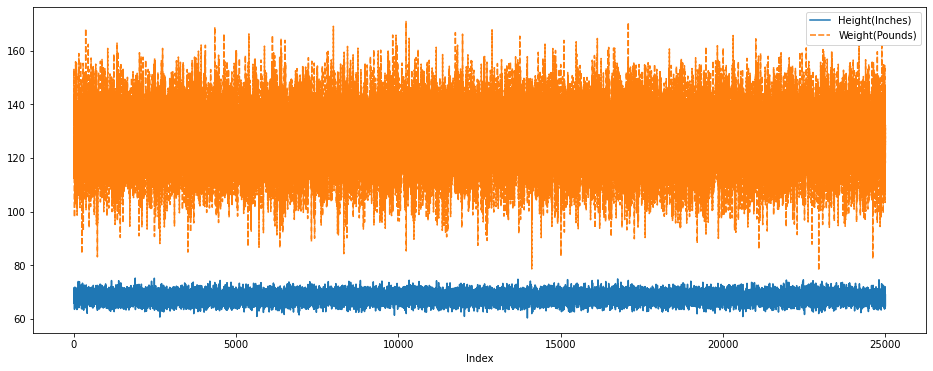

In [3]:
# set the width and height of the figure
plt.figure(figsize=(16,6))

#Line chart showing how weight behaves
sns.lineplot(data=dataset)

This does not make sense since height and weights are quantitative data and they don't have a time period. The best sceraio in this case is bar chart, and histogram to check the distribution, frequency chart and a scatter plot.

### Bar Charts and Heatmaps
They are quick to compare information, revealing highs & lows at a glance
Effective when you have numerical data that splits nicely into different categories.
Best used to:
* Show change over time
* Compare different categories
* Compare parts of a whole

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average weight(Pounds)")

# Bar chart showing the Average Height
sns.barplot(x=dataset.index, y=dataset['Weight(Pounds)'])
plt.ylabel("Weight(Pounds)")

Text(0, 0.5, 'Weight(Pounds)')